In [319]:
#Patrick Woods, UID: 113520266, Project 2

import sqlite3
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

#Part 1, Problem 1
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
salary_query = "SELECT teamID, yearID, sum(salary) as team_payroll FROM Salaries GROUP BY yearID, teamID" #query for salary 
team_salaries = pandas.read_sql(salary_query, conn)
team_q = "SELECT yearID, teamID, G, W, L FROM Teams WHERE yearID > '1984'" #query for game info
team_tot = pandas.read_sql(team_q, conn)
p1_table = team_salaries.merge(team_tot, on=['teamID', 'yearID'], how='left') #combine into single dataframe

In [320]:
#drop columns with missing data, compute win %, and compare win % to payroll, then add to table
win_percent = list();
relation_list = list();

for index, row in p1_table.iterrows():
    if math.isnan(row['G']):
        p1_table.drop(axis=0, labels=index, inplace=True)
        
    else:
        percent_temp = (row['W'] / row['G']) * 100
        win_percent.append(percent_temp)
        #added column to see rough idea of payroll effectiveness - higher value = more effective
        relation_list.append(percent_temp / (row['team_payroll'] / 100000)) #cut the value to make it more readable
        
p1_table['win_percentage'] = win_percent
p1_table['payroll effectiveness'] = relation_list
p1_table

,teamID,yearID,team_payroll,G,W,L,win_percentage,payroll effectiveness
0,ATL,1985,14807000.0,162.0,66.0,96.0,40.740741,0.275145
1,BAL,1985,11560712.0,161.0,83.0,78.0,51.552795,0.445931
2,BOS,1985,10897560.0,163.0,81.0,81.0,49.693252,0.456003
3,CAL,1985,14427894.0,162.0,90.0,72.0,55.555556,0.385057
4,CHA,1985,9846178.0,163.0,85.0,77.0,52.147239,0.529619
5,CHN,1985,12702917.0,162.0,77.0,84.0,47.530864,0.374173
6,CIN,1985,8359917.0,162.0,89.0,72.0,54.938272,0.657163
7,CLE,1985,6551666.0,162.0,60.0,102.0,37.037037,0.565307
8,DET,1985,10348143.0,161.0,84.0,77.0,52.173913,0.504186
9,HOU,1985,9993051.0,162.0,83.0,79.0,51.234568,0.512702


Problem 1 info: Seemingly, there were only two rows in the Salaries table missing from the Teams table. When I combined the tables, NaNs were filled in for G/W/L columns. I simply deleted those rows as with such a large amount of data, I didn't feel that including those 2 rows of data were necessary. Additionally, I didn't want to interpolate those values because there really isn't any reliable way to predict or estimate what the W/L would have been for those teams. 

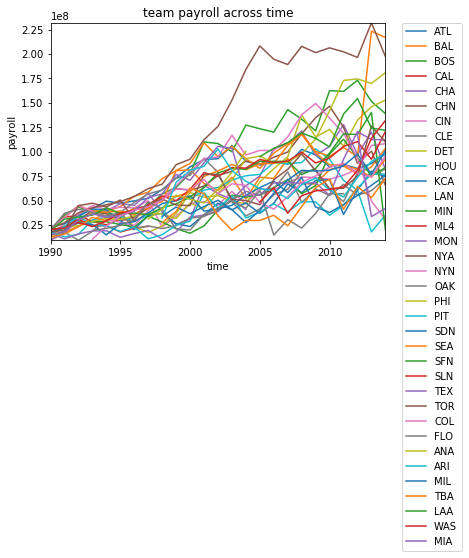

In [321]:
#Part 2, Problem 2
p2_table = p1_table[p1_table.yearID > 1989] #data only for 1990 and on
teams = p2_table.teamID.unique()

#setup graph
plt.ylabel('payroll')
plt.xlabel('time')
plt.axis([1990, 2014, (p2_table['team_payroll'].min()), (p2_table['team_payroll'].max())])
plt.title('team payroll across time')

#plot line for each team
for team in teams:
    payroll_temp = p2_table.loc[p2_table['teamID'] == team, 'team_payroll']
    years_temp = p2_table.loc[p2_table['teamID'] == team, 'yearID']
    plt.plot(years_temp.to_list(), payroll_temp.to_list(), label=team)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #make legend

Question 1:
Several statements can be made about the above graph. First, the deviation of the payrolls per team increases
along with time. In other words, the difference between payrolls increases as the years increase. Second, the mean of the 
average payroll increases as the years increase. Third, the minimum payroll relatively remains the same throughout the years
while the maximum payroll drastically increases as the years increase.

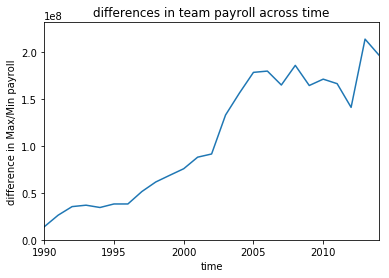

In [322]:
#Problem 3, modelling first statement
#setup graph
plt.ylabel('difference in Max/Min payroll')
plt.xlabel('time')
plt.axis([1990, 2014, 0, (p2_table['team_payroll'].max())])
plt.title('differences in team payroll across time')
years = p2_table.yearID.unique()
pay_diff = list()

#calculate pay difference for each year
for year in years:
    payroll_temp = p2_table.loc[p2_table['yearID'] == year, 'team_payroll'] #grab payrolls for given year
    pay_diff.append(payroll_temp.max() - payroll_temp.min())
    
plt.plot(years, pay_diff)

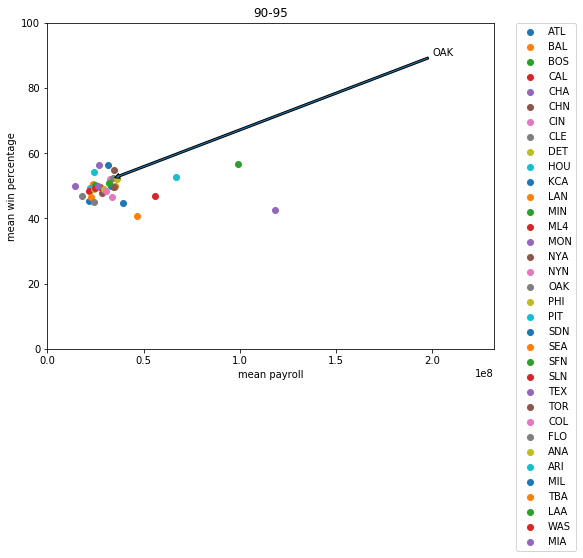

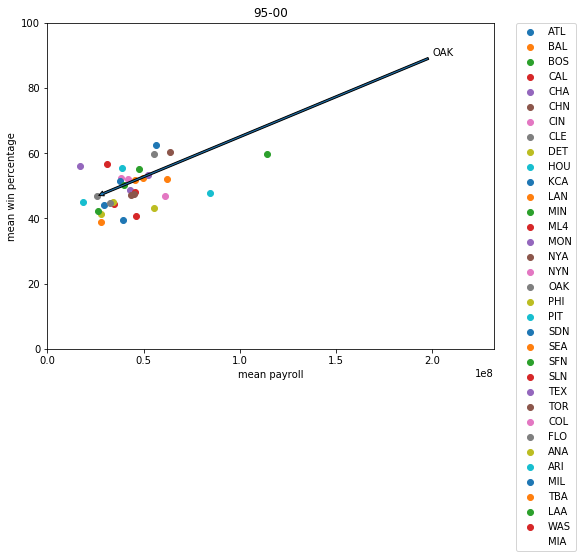

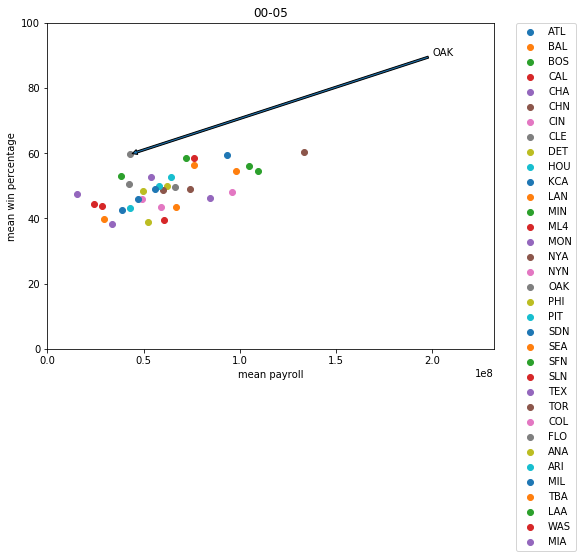

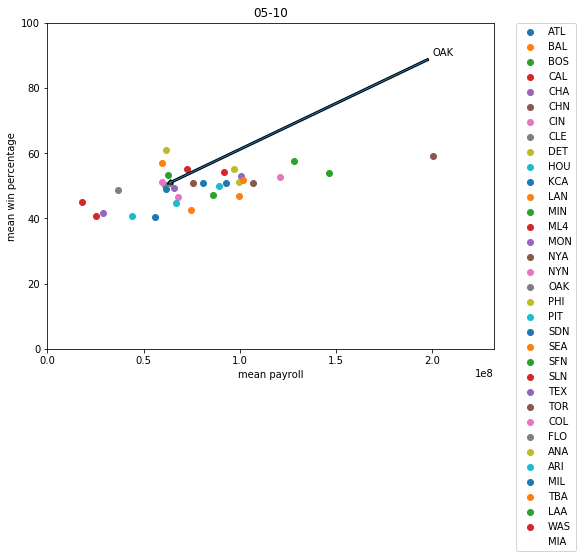

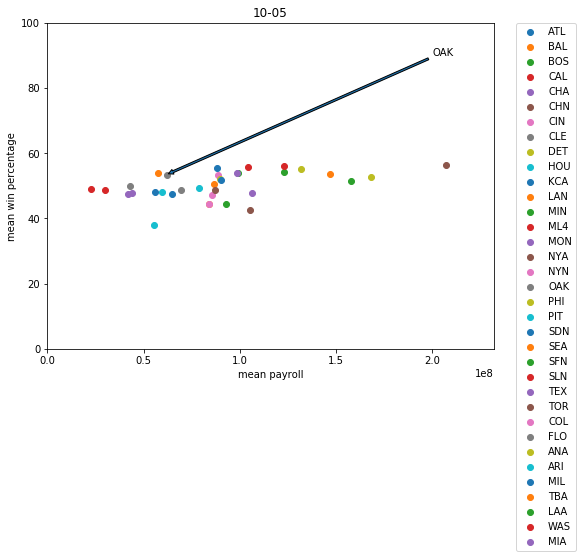

In [323]:
#Problem 4

#setup the 5 graphs
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
fig4, ax4 = plt.subplots(figsize=(8,6))
fig5, ax5 = plt.subplots(figsize=(8,6))
ax.set_xlim([0, (p2_table['team_payroll'].max())])
ax.set_ylim([0, 100])
ax.set_title('90-95')
ax.set_xlabel('mean payroll')
ax.set_ylabel('mean win percentage')
ax2.set_xlim([0, (p2_table['team_payroll'].max())])
ax2.set_ylim([0, 100])
ax2.set_title('95-00')
ax2.set_xlabel('mean payroll')
ax2.set_ylabel('mean win percentage')
ax3.set_xlim([0, (p2_table['team_payroll'].max())])
ax3.set_ylim([0, 100])
ax3.set_title('00-05')
ax3.set_xlabel('mean payroll')
ax3.set_ylabel('mean win percentage')
ax4.set_xlim([0, (p2_table['team_payroll'].max())])
ax4.set_ylim([0, 100])
ax4.set_title('05-10')
ax4.set_xlabel('mean payroll')
ax4.set_ylabel('mean win percentage')
ax5.set_xlim([0, (p2_table['team_payroll'].max())])
ax5.set_ylim([0, 100])
ax5.set_title('10-05')
ax5.set_xlabel('mean payroll')
ax5.set_ylabel('mean win percentage')

#make DF for each team, make a cut on each team's table, find the means for 
#payroll and win percentage for each time frame, and make the plot on each
#graph for the current team.
for team in teams:
    team_table = p2_table[p2_table.teamID == team] #new DF
    bins = pandas.cut(team_table['yearID'], 5) #cut
    disc_data = team_table.groupby(bins)['win_percentage', 'team_payroll'].agg('mean') #find means
    counter = 0
    
    for wp, pr in zip(disc_data.win_percentage, disc_data.team_payroll): #loop to plot for each time frame
        if counter == 0: #plot for 90-95
            ax.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax.annotate(s=team, xy=(pr,wp), xytext=(200000000,90), arrowprops={'arrowstyle': 'simple'})
        elif counter == 1: #plot for 95-00
            ax2.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax2.annotate(s=team, xy=(pr,wp), xytext=(200000000,90), arrowprops={'arrowstyle': 'simple'})
        elif counter == 2: #plot for 00-05
            ax3.scatter(pr, wp, label=team)
            if team == 'OAK':#label OAK
                ax3.annotate(s=team, xy=(pr,wp), xytext=(200000000,90), arrowprops={'arrowstyle': 'simple'})
        elif counter == 3: #plot for 05-10
            ax4.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax4.annotate(s=team, xy=(pr,wp), xytext=(200000000,90), arrowprops={'arrowstyle': 'simple'})
        else: #plot for 10-15
            ax5.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax5.annotate(s=team, xy=(pr,wp), xytext=(200000000,90), arrowprops={'arrowstyle': 'simple'})
        counter += 1
    
#set legends
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax5.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Question 2: You can say that team payrolls not only spread out, but also cost more with time. The teams who most consistently are "pay-to-win" seem to be NYA, BOS, and ATL. What's interesting about the OAKs is that they go from a 50 win % and below team, to 50 win % and over team all the while keeping their spending below average. Thus, their spending efficiency vastly increases, and at certain points, is by far the best in the league.

In [324]:
#Part 3, Problem 5
stand_payroll = list()

for year in years:
    year_table = p2_table[p2_table.yearID == year] #new DF
    sd_payroll = year_table.std().team_payroll #sd of payroll per year
    avg_payroll = year_table.mean().team_payroll #mean of payroll per year
    for index, row in year_table.iterrows(): #add new value for each team/year combo
        stand_payroll.append((row['team_payroll'] - avg_payroll) / sd_payroll)
        
p2_table['stand_payroll'] = stand_payroll #add new column to DF
print(p2_table)
#I checked the warning and made sure only the p2_table was edited and not the p1_table, all is good

    teamID  yearID  team_payroll      G      W     L  win_percentage  \
130    ATL    1990    14555501.0  162.0   65.0  97.0       40.123457   
131    BAL    1990     9680084.0  161.0   76.0  85.0       47.204969   
132    BOS    1990    20558333.0  162.0   88.0  74.0       54.320988   
133    CAL    1990    21720000.0  162.0   80.0  82.0       49.382716   
134    CHA    1990     9491500.0  162.0   94.0  68.0       58.024691   
135    CHN    1990    13624000.0  162.0   77.0  85.0       47.530864   
136    CIN    1990    14370000.0  162.0   91.0  71.0       56.172840   
137    CLE    1990    14487000.0  162.0   77.0  85.0       47.530864   
138    DET    1990    17593238.0  162.0   79.0  83.0       48.765432   
139    HOU    1990    18330000.0  162.0   75.0  87.0       46.296296   
140    KCA    1990    23361084.0  161.0   75.0  86.0       46.583851   
141    LAN    1990    21318704.0  162.0   86.0  76.0       53.086420   
142    MIN    1990    14602000.0  162.0   74.0  88.0       45.67

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


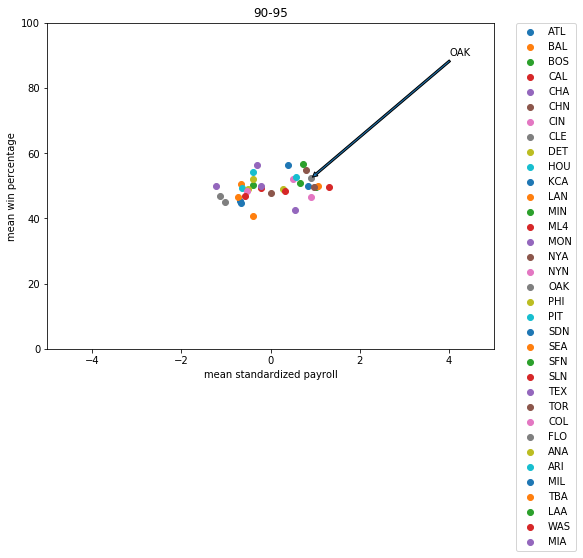

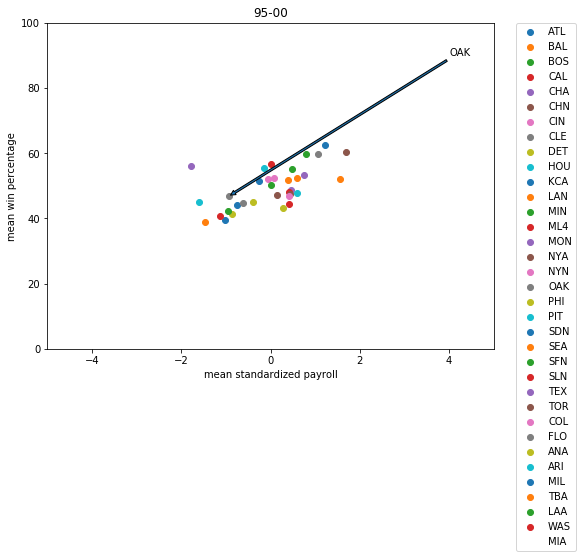

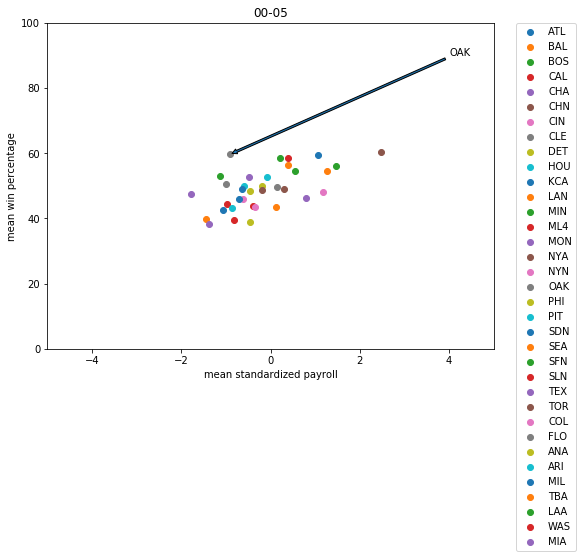

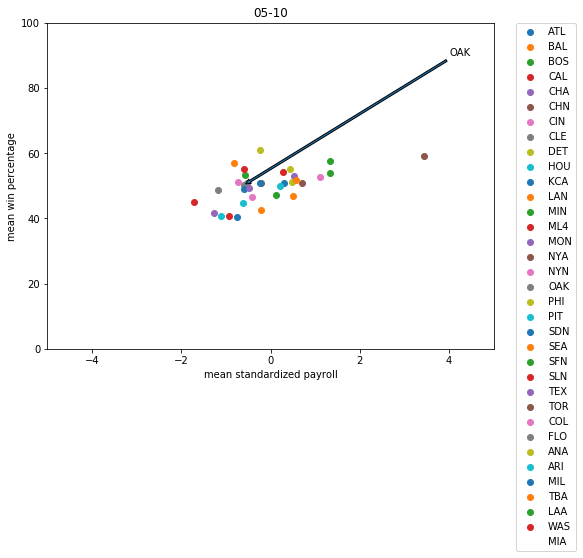

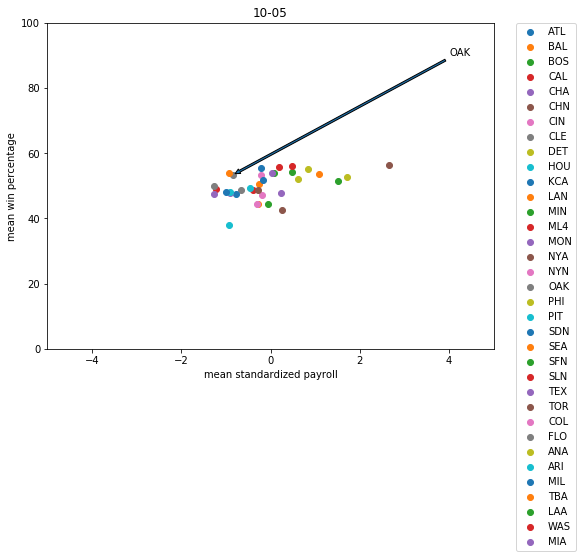

In [325]:
#Problem 6
#setup the 5 graphs
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
fig4, ax4 = plt.subplots(figsize=(8,6))
fig5, ax5 = plt.subplots(figsize=(8,6))
ax.set_xlim([-5, 5])
ax.set_ylim([0, 100])
ax.set_title('90-95')
ax.set_xlabel('mean standardized payroll')
ax.set_ylabel('mean win percentage')
ax2.set_xlim([-5, 5])
ax2.set_ylim([0, 100])
ax2.set_title('95-00')
ax2.set_xlabel('mean standardized payroll')
ax2.set_ylabel('mean win percentage')
ax3.set_xlim([-5, 5])
ax3.set_ylim([0, 100])
ax3.set_title('00-05')
ax3.set_xlabel('mean standardized payroll')
ax3.set_ylabel('mean win percentage')
ax4.set_xlim([-5, 5])
ax4.set_ylim([0, 100])
ax4.set_title('05-10')
ax4.set_xlabel('mean standardized payroll')
ax4.set_ylabel('mean win percentage')
ax5.set_xlim([-5, 5])
ax5.set_ylim([0, 100])
ax5.set_title('10-05')
ax5.set_xlabel('mean standardized payroll')
ax5.set_ylabel('mean win percentage')

#make DF for each team, make a cut on each team's table, find the means for 
#stand_payroll and win percentage for each time frame, and make the plot on each
#graph for the current team.
for team in teams:
    team_table = p2_table[p2_table.teamID == team] #new DF
    bins = pandas.cut(team_table['yearID'], 5) #cut
    disc_data = team_table.groupby(bins)['win_percentage', 'stand_payroll'].agg('mean') #find means
    counter = 0
    
    for wp, pr in zip(disc_data.win_percentage, disc_data.stand_payroll): #loop to plot for each time frame
        if counter == 0: #plot for 90-95
            ax.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax.annotate(s=team, xy=(pr,wp), xytext=(4,90), arrowprops={'arrowstyle': 'simple'})
        elif counter == 1: #plot for 95-00
            ax2.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax2.annotate(s=team, xy=(pr,wp), xytext=(4,90), arrowprops={'arrowstyle': 'simple'})
        elif counter == 2: #plot for 00-05
            ax3.scatter(pr, wp, label=team)
            if team == 'OAK':#label OAK
                ax3.annotate(s=team, xy=(pr,wp), xytext=(4,90), arrowprops={'arrowstyle': 'simple'})
        elif counter == 3: #plot for 05-10
            ax4.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax4.annotate(s=team, xy=(pr,wp), xytext=(4,90), arrowprops={'arrowstyle': 'simple'})
        else: #plot for 10-15
            ax5.scatter(pr, wp, label=team)
            if team == 'OAK': #label OAK
                ax5.annotate(s=team, xy=(pr,wp), xytext=(4,90), arrowprops={'arrowstyle': 'simple'})
        counter += 1
    
#set legends
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax4.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax5.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Question 3: The plots for problem 6 make it much easier to see the deviation of payrolls for the teams. It also consolidates the data points, making them easier to compare to each other, and to the mean for that given time frame. The points are centered around the center of the graph, reflecting the standardizing of the payroll variable.

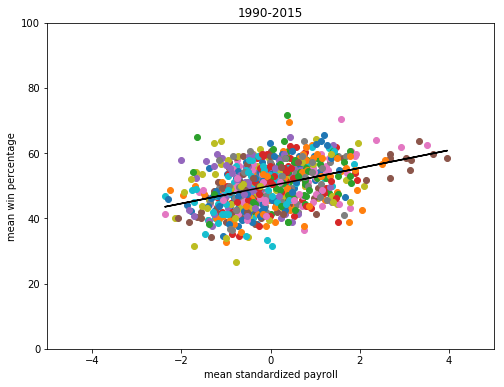

In [326]:
#Problem 7
#setup graph
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim([-5, 5])
ax.set_ylim([0, 100])
ax.set_title('1990-2015')
ax.set_xlabel('mean standardized payroll')
ax.set_ylabel('mean win percentage')

#plot each team/year combo
for index, row in p2_table.iterrows():
    ax.scatter(row['stand_payroll'], row['win_percentage'])
    
#add regression line
x_temp = p2_table.stand_payroll
y_temp = p2_table.win_percentage
b, m = polyfit(x_temp, y_temp, 1)
plt.plot(x_temp, b + m * x_temp, 'k-')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


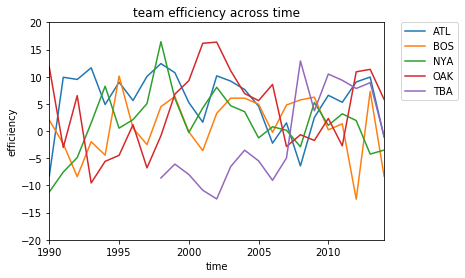

In [327]:
#Problem 8
#setup graph
plt.ylabel('efficiency')
plt.xlabel('time')
plt.axis([1990, 2014, -20, 20])
plt.title('team efficiency across time')
spend_efficiency = list()

#calculate expected win %, then calculate efficiency, then add to DF
for index, row in p2_table.iterrows():
    exp_percentage = 50 + (2.5 * row['stand_payroll'])
    eff = row['win_percentage'] - exp_percentage
    spend_efficiency.append(eff)
    
p2_table['spend_efficiency'] = spend_efficiency

#plot lines for ATL, NYA, BOS, OAK, TBA
for team in teams:
    if team == 'ATL' or team == 'NYA' or team == 'BOS' or team == 'OAK' or team == 'TBA':
        spend_temp = p2_table.loc[p2_table['teamID'] == team, 'spend_efficiency']
        years_temp = p2_table.loc[p2_table['teamID'] == team, 'yearID']
        plt.plot(years_temp.to_list(), spend_temp.to_list(), label=team)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #make legend

Question 4: This plot allows you to check the spending efficiency through all the time periods simultanously, allowing for more effective comparisons. We see that Oakland went from last in efficiency, to spiking up to and maintaining the most dominant efficiency for several years. No other team (at least out of the generally considered most dominant baseball franchises of this time period) was able to accomplish this. Oakland's efficiency during the moneyball period is unrivaled by any other team.